# Canada Population Retirement Data Analysis 

#1.All of population belongs to CANADA
#2.Extracted only the working population data(because they are eligible for retirement)
#3.All 3 categories of working class are considered for analysis(Private,Public and Self)
#4.'DECIMALS','TERMINATED','SYMBOL','COORDINATE','VECTOR','SCALAR_ID','SCALAR_FACTOR','UOM_ID','UOM','DGUID','GEO' from train_data is not required as has same value in all records
#5.	The average Female Self employed retirement age was assumed to be minimum value between the corresponding male and total values

In [1]:
import numpy as np
import pandas as pd
canada_data = pd.read_csv("train_data.csv")

In [2]:
canada_data.head()

,REF_DATE,GEO,DGUID,Retirement age,Class of worker,Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976,Canada,2016A000011124,Average age,"Total, all retirees",Both sexes,Years,308,units,0,v2342630,1.1.1.1,64.9,NaN,NaN,NaN,1
1,1976,Canada,2016A000011124,Average age,"Total, all retirees",Males,Years,308,units,0,v2342638,1.1.1.2,65.3,NaN,NaN,NaN,1
2,1976,Canada,2016A000011124,Average age,"Total, all retirees",Females,Years,308,units,0,v2342646,1.1.1.3,63.9,NaN,NaN,NaN,1
3,1976,Canada,2016A000011124,Average age,Public sector employees,Both sexes,Years,308,units,0,v2342632,1.1.2.1,63.5,NaN,NaN,NaN,1
4,1976,Canada,2016A000011124,Average age,Public sector employees,Males,Years,308,units,0,v2342640,1.1.2.2,63.7,NaN,NaN,NaN,1


# Problem resolution

#Used a Linear regression model to make predictions regarding the retirement age. 

In [4]:
canada_data = canada_data.drop(columns=['DECIMALS','TERMINATED','SYMBOL','COORDINATE','VECTOR','SCALAR_ID','SCALAR_FACTOR','UOM_ID','UOM','DGUID','GEO'])

#The records having 'STATUS' as 'x' had missing values in 'VALUE' which were replaced with the minimum value from the group.

In [6]:
canada_data[canada_data['STATUS']=='x'].head()

,REF_DATE,Retirement age,Class of worker,Sex,VALUE,STATUS
11,1976,Average age,Self-employed,Females,NaN,x
23,1976,Median age,Self-employed,Females,NaN,x
35,1977,Average age,Self-employed,Females,NaN,x
47,1977,Median age,Self-employed,Females,NaN,x
83,1979,Average age,Self-employed,Females,NaN,x


#The columns which had only one value and did not make any contribution to analysing the age of retirement were removed. The removed columns are : ['DECIMALS','TERMINATED','SYMBOL','COORDINATE','VECTOR','SCALAR_ID','SCALAR_FACTOR','UOM_ID','UOM','DGUID','GEO']
#Considered taking the average of the retirement ages instead of median as the frequency of customer base may change in the coming years
#It is observed that whenever column 'STATUS' had value 'x' the column 'VALUE' had 'Nan'. Further it is also visible that everyone of these records had 'Sex' as 'Female' and 'Class of worker ' as 'Self-employed'

In [8]:
canada_data_avg = canada_data[canada_data['Retirement age']=='Average age'].drop(columns=['STATUS','Retirement age'])
canada_data_med = canada_data[canada_data['Retirement age']=='Median age'].drop(columns=['STATUS','Retirement age'])

In [11]:
canada_data_med = canada_data[canada_data['Retirement age']=='Median age'].drop(columns=['STATUS','Retirement age'])

In [12]:
canada_data_med[['Sex','VALUE']]=canada_data_med.groupby(['REF_DATE','Class of worker']).transform(lambda x: x.fillna(x.min()))

In [14]:
canada_data_avg_total = canada_data_avg[canada_data_avg['Sex']=='Both sexes']
canada_data_avg.head()

,REF_DATE,Class of worker,Sex,VALUE
0,1976,"Total, all retirees",Both sexes,64.9
1,1976,"Total, all retirees",Males,65.3
2,1976,"Total, all retirees",Females,63.9
3,1976,Public sector employees,Both sexes,63.5
4,1976,Public sector employees,Males,63.7


In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import LabelEncoder

In [16]:
num = LabelEncoder()
canada_data_avg_total['Class of worker'] = num.fit_transform(canada_data_avg_total['Class of worker'].astype('str'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Converted categorical variable 'Class of worker' to numeric

In [18]:
canada_data_avg_total.head()

,REF_DATE,Class of worker,Sex,VALUE
0,1976,3,Both sexes,64.9
3,1976,1,Both sexes,63.5
6,1976,0,Both sexes,65.0
9,1976,2,Both sexes,66.4
24,1977,3,Both sexes,65.1


#Making predictive analysis using Linear Regression model from scikit learn(sklearn package in python)

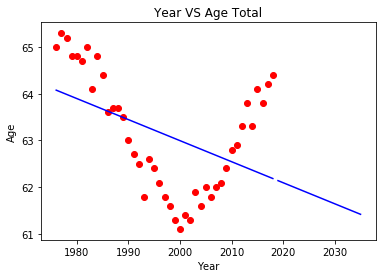

In [22]:
from sklearn.linear_model import LinearRegression 
canada_data_avg_total0 = canada_data_avg_total[(canada_data_avg_total['Class of worker']==0)]
X0 = canada_data_avg_total0[['REF_DATE','Class of worker']] 
y0 = np.array(canada_data_avg_total0['VALUE']).reshape(-1, 1)
regr = LinearRegression() 
regr.fit(X0, y0)
X_test0 = pd.DataFrame({'REF_DATE':[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035],
                     'Class of worker':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
y_pred0 = regr.predict(X_test0)

import matplotlib.pyplot as plot
plot.scatter(X0['REF_DATE'], y0, color = 'red')
plot.plot(X0['REF_DATE'], regr.predict(X0), color = 'blue')
plot.plot(X_test0['REF_DATE'], y_pred0, color = 'blue')
plot.title('Year VS Age Total')
plot.xlabel('Year')
plot.ylabel('Age')
plot.show()



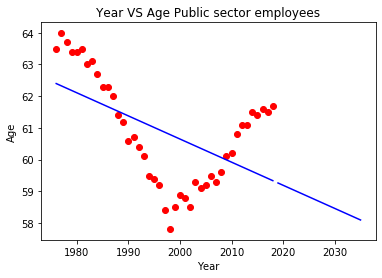

In [23]:
from sklearn.linear_model import LinearRegression 
canada_data_avg_total1 = canada_data_avg_total[(canada_data_avg_total['Class of worker']==1)]
X1 = canada_data_avg_total1[['REF_DATE','Class of worker']] 
y1 = np.array(canada_data_avg_total1['VALUE']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(X1, y1)
X_test1 = pd.DataFrame({'REF_DATE':[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035],
                     'Class of worker':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]})

y_pred1 = regr.predict(X_test1)
import matplotlib.pyplot as plot1
plot1.scatter(X1['REF_DATE'], y1, color = 'red')
plot1.plot(X1['REF_DATE'], regr.predict(X1), color = 'blue')
plot1.plot(X_test1['REF_DATE'], y_pred1, color = 'blue')
plot1.title('Year VS Age Public sector employees')
plot1.xlabel('Year')
plot1.ylabel('Age')
plot1.show()

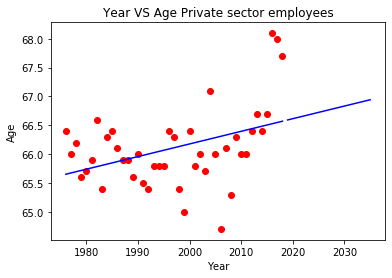

In [24]:

from sklearn.linear_model import LinearRegression 
canada_data_avg_total2 = canada_data_avg_total[(canada_data_avg_total['Class of worker']==2)]
X2 = canada_data_avg_total2[['REF_DATE','Class of worker']] 
y2 = np.array(canada_data_avg_total2['VALUE']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(X2, y2)
X_test2 = pd.DataFrame({'REF_DATE':[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035],
                     'Class of worker':[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]})

y_pred2 = regr.predict(X_test2)
import matplotlib.pyplot as plot2
plot2.scatter(X2['REF_DATE'], y2, color = 'red')
plot2.plot(X2['REF_DATE'], regr.predict(X2), color = 'blue')
plot2.plot(X_test2['REF_DATE'], y_pred2, color = 'blue')
plot2.title('Year VS Age Private sector employees')
plot2.xlabel('Year')
plot2.ylabel('Age')
plot2.show()

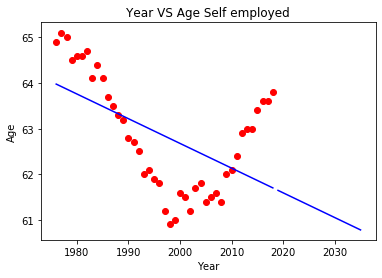

In [25]:
from sklearn.linear_model import LinearRegression 
canada_data_avg_total3 = canada_data_avg_total[(canada_data_avg_total['Class of worker']==3)]
X3 = canada_data_avg_total3[['REF_DATE','Class of worker']] 
y3 = np.array(canada_data_avg_total3['VALUE']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(X3, y3)
X_test3 = pd.DataFrame({'REF_DATE':[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035],
                     'Class of worker':[3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]})

y_pred3 = regr.predict(X_test3)

import matplotlib.pyplot as plot3
plot3.scatter(X3['REF_DATE'], y3, color = 'red')
plot3.plot(X3['REF_DATE'], regr.predict(X3), color = 'blue')
plot3.plot(X_test3['REF_DATE'], y_pred3, color = 'blue')
plot3.title('Year VS Age Self employed')
plot3.xlabel('Year')
plot3.ylabel('Age')
plot3.show()

#Conculsion 



#According to the predicted retirement age for 2035 which is greater than or equal to 42